In [29]:
# in this notebook varya is trying to fit the model to classify DF and FF 
# based on some features of the catchments (such as morphometrics and/or climate stuff)

In [30]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

# i will try to use this tutorial

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore



### read data

 - make sure it has the target value X (1/0 -> DF/FF)
 - make sure its only 1 and 0 (not anything else) 
 - calculate correlations and scatter plots to look at how data looks 
 - make histograms for all features (to see how data looks like for different classes)
 - normalize with the z-score (just curious if it will change smth 

In [32]:
# read data: 

# in the copy table i have changed the FF/DF column 
# df = pd.read_csv('morphometrical_params.csv', sep = ';', index_col = 0)
df = pd.read_csv('/Users/varyabazilova/Desktop/alluvial_fans/dem_all/all_points_so_far/10_datawrangl_formodel!!/morphometrical_params.csv', sep = ';', index_col = 0)
df = df[df.target.isin([1,0])]
# reset FF/DF to 0 and 1
# all - flood, some - DF
# df['target'] = df.Name = 

In [33]:
df.head()

,DN,target,Name,x_centroid,y_centroid,area_m,perimeter,glaciersum,mean_elevation,median_elevation,...,max_slope,range_slope,variance_slope,glarea_percent,glacier,x_wgs,y_wgs,M,Rc,Cc
0,2,1,DF,6533932.497,-500205.440,323908.568,3584.675,0.000,4738.964789,4764.5,...,73.454002,68.675880,189.262607,0.00000,0,85.622,28.207,5.082328e+05,0.316762,1.789410
1,3,1,DF,6534113.836,-500799.045,182483.700,2922.889,0.000,4568.158333,4594.5,...,69.205093,66.178936,239.110864,0.00000,0,85.617,28.205,2.584446e+05,0.268417,1.943889
2,4,1,DF,6533894.325,-503821.445,205294.163,2702.293,0.000,4182.414815,4179.0,...,49.839001,37.792932,58.833395,0.00000,0,85.591,28.205,2.854492e+05,0.353282,1.694398
3,5,0,"Mixed - new looks FF, vegetated DF",6531952.768,-502250.739,8413968.867,19907.851,2763.123,4867.525384,4886.5,...,59.196445,58.829133,129.789809,0.03284,1,85.603,28.226,5.212530e+06,0.266785,1.949823
4,7,0,FF - lower lef DF remnants?,6535837.722,-503989.910,359644.959,3750.121,0.000,4346.589852,4321.0,...,58.032841,51.812997,91.630189,0.00000,0,85.591,28.184,4.587736e+05,0.321361,1.776559


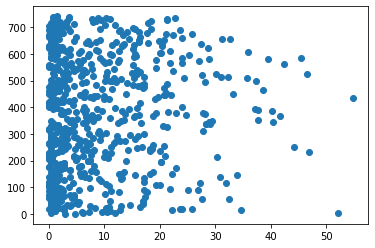

In [34]:
plt.scatter(df.min_slope, y = df.index)

Text(0.5, 1.0, 'various parameters')

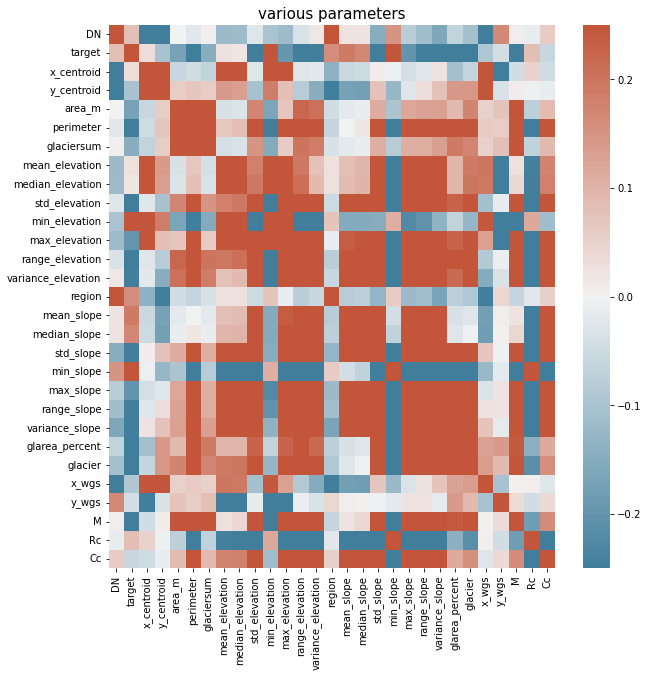

In [35]:
# correlations
df_corr = df.corr()


# plot

plt.figure(figsize=(10, 10))

# mask for the upper triangle
# mask = np.triu(np.ones_like(df_corr, dtype=bool))
# color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# heatmap 
# sns.heatmap(df_corr, cmap=cmap, mask = mask)
sns.heatmap(df_corr, cmap=cmap, vmin = -0.25, vmax = 0.25)
plt.title('various parameters', fontsize = 15)



In [36]:
# scatter plot (stupid one for now) 
# g = sns.PairGrid(df, hue = 'target')
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

# plt.savefig('params_scatter_sub.png', dpi = 300, bbox_inches = 'tight')


In [37]:
# scale the data with the z score: 


In [46]:
# z score (#!!! maybe think about not including region number here) 

df = df[['target', 'area_m', 'perimeter', 'glaciersum', 'mean_elevation', 'median_elevation', 
         'std_elevation', 'min_elevation', 'max_elevation', 'range_elevation',
         'variance_elevation', 'region', 'mean_slope', 'median_slope', 'std_slope', 
         'min_slope', 'max_slope', 'range_slope',
         'variance_slope', 'glarea_percent', 'glacier', 'x_wgs', 'y_wgs', 'M', 'Rc', 'Cc']]

dfz = df.apply(zscore)
dfz.head()

,target,area_m,perimeter,glaciersum,mean_elevation,median_elevation,std_elevation,min_elevation,max_elevation,range_elevation,...,max_slope,range_slope,variance_slope,glarea_percent,glacier,x_wgs,y_wgs,M,Rc,Cc
0,0.574221,-0.117850,-0.404523,-0.095920,0.748443,0.754410,-0.536311,0.828620,0.268787,-0.459021,...,0.890031,0.787584,1.467503,-0.338281,-0.553349,1.471906,-2.292733,-0.373069,-0.400704,0.193027
1,0.574221,-0.119802,-0.441653,-0.095920,0.530024,0.539020,-0.726029,0.897092,0.026802,-0.773787,...,0.652822,0.686322,2.212975,-0.338281,-0.553349,1.471034,-2.293260,-0.402386,-0.657128,0.643531
2,0.574221,-0.119487,-0.454030,-0.095920,0.036755,0.012581,-0.721720,0.509490,-0.277765,-0.746463,...,-0.428357,-0.464858,-0.483045,-0.338281,-0.553349,1.466499,-2.293260,-0.399216,-0.207000,-0.084054
3,-1.741490,-0.006181,0.511297,-0.095398,0.912840,0.908984,0.540355,0.529054,0.956149,0.528993,...,0.094055,0.388254,0.578097,-0.332106,1.807179,1.468592,-2.287733,0.179047,-0.665780,0.660835
4,-1.741490,-0.117356,-0.395241,-0.095920,0.246693,0.192495,-0.474486,0.652548,-0.014919,-0.598917,...,0.029092,0.103719,0.007426,-0.338281,-0.553349,1.466499,-2.298787,-0.378874,-0.376309,0.155549


In [23]:
# dfz

# model stuff

In [39]:
# subset the data: 

df.columns

Index(['target', 'area_m', 'perimeter', 'glaciersum', 'mean_elevation',
       'median_elevation', 'std_elevation', 'min_elevation', 'max_elevation',
       'range_elevation', 'variance_elevation', 'region', 'mean_slope',
       'median_slope', 'std_slope', 'min_slope', 'max_slope', 'range_slope',
       'variance_slope', 'glarea_percent', 'glacier', 'x_wgs', 'y_wgs', 'M',
       'Rc', 'Cc'],
      dtype='object')

In [40]:
x_columns = [ 'area_m', 'perimeter', 'glaciersum', 'mean_elevation', 'median_elevation', 
         'std_elevation', 'min_elevation', 'max_elevation', 'range_elevation',
         'variance_elevation', 'region', 'mean_slope', 'median_slope', 'std_slope', 
         'min_slope', 'max_slope', 'range_slope',
         'variance_slope', 'glarea_percent', 'glacier', 'x_wgs', 'y_wgs', 'M', 'Rc', 'Cc']
y_column = 'target'

In [41]:
# ------- split data into X and y
X = df[x_columns]
y = df[y_column]

In [42]:
# ------- split to train test: 

seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [43]:
# 1. fit model to training data

model = XGBClassifier(n_estimators=1000, depth=2)
model.fit(X_train, y_train)

[11:54:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              depth=2, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [44]:
# print(model)

In [45]:
# 5. Make Predictions

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
# accuracy = accuracy_score(y_test, predictions)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.84%


In [ ]:
len(df)

In [ ]:
# random guess: 

555/738 * 100#df/total 

### model evaluation/validation stuff: (todo)

 - ROC curve 
 - AUC curve 
 - precision/recall curve 
 - F1 score 
 - confusion matrix
 - cross validation( k10 -?)
 
 

In [ ]:
# predict probability (not class) 

probs = model.predict_proba(X_test)
# 2 columns: (1) 0 is true, (2) 1 is true
# therefore take the 2nd column:
probs = probs[:,1]



In [ ]:
# ------- probability distributions plot:

# calculate probabilities 
# split into 2 classes 

debris = df[df.target.isin([1,])] # df
flood = df[df.target.isin([0,])]  # ff 

# split data into X and y
Xdebris = debris[x_columns]
ydebris = debris[y_column]

Xflood = flood[x_columns]
yflood = flood[y_column]

# debris:
dfprobs = model.predict_proba(Xdebris)
dfprobs = dfprobs[:,1]
# floods:
ffprobs = model.predict_proba(Xflood)
ffprobs = ffprobs[:,1]



# ------- histograms -------
# normalize: 
# dfprobs = dfprobs/dfprobs.sum()
# ffprobs = ffprobs/ffprobs.sum()

# plot:
# plt.hist(ffprobs, bins = np.arange(0, 1, 25))
# plt.hist(dfprobs, bins = np.arange(0, 1, 25))

fig, ax = plt.subplots()

# ax.hist(ffprobs, bins=np.linspace(0,1, 25))
# ax.hist(dfprobs,bins=np.linspace(0,1, 25))


# normalize histogram (example)
h, e = np.histogram(ffprobs, bins=np.linspace(0, 1, 25))

ax.plot(e[:-1], h/h.sum())

hd, ed = np.histogram(dfprobs, bins=np.linspace(0, 1, 25))
ax.plot(ed[:-1], hd/hd.sum())

In [ ]:
### ROC curve: 
from sklearn.metrics import roc_curve, auc

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')



In [ ]:
# probs

### model meaning: 

 - what features are important: gain and weight (plots here) 

In [ ]:
## overall todo: 
# - play around with model tuning and make sure you have optimal hyperparameters (all these model evaluation plots etc) 
# - evaluation 
# meaning things 